In [1]:
import setGPU

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('../scripts')
from data_reading import *

setGPU: Setting GPU to: 0


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

In [2]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi/2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles)+np.sin(angles)/2 + noise * np.random.randn(m)/2
    data[:, 1] = np.sin(angles)*0.7+noise*np.random.randn(m)/2
    data[:, 2] = data[:, 0]*w1 + data[:, 1] * w2 + noise*np.random.randn(m)
    
    return data

In [3]:
x_train = generate_3d_data(60)
print(x_train.shape)

(60, 3)


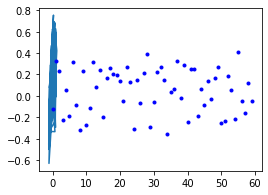

In [4]:
fig = plt.figure(figsize=(4, 3))
plt.plot(x_train[:,0], x_train[:,1], x_train[:,2], "b.")

In [5]:
data_obj = public_datasets()

x_train, y_train, x_test, y_test = data_obj.load_mnist()
input_dim = 784

In [6]:
x_train[0].shape

(784,)

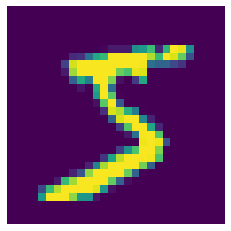

In [7]:
w = h = 28
plt.imshow(x_train[0].reshape(w, h))
plt.axis('off')
plt.show()

In [8]:
latent_dim = 32
encoder = tf.keras.models.Sequential([tf.keras.layers.Dense(latent_dim, input_shape=[input_dim])])
decoder = tf.keras.models.Sequential([tf.keras.layers.Dense(input_dim, input_shape=[latent_dim])])

autoencoder = tf.keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1.5), metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
history = autoencoder.fit(x_train, x_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0380 - acc: 0.0132
Epoch 2/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0223 - acc: 0.0119
Epoch 3/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0190 - acc: 0.0115
Epoch 4/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0179 - acc: 0.0117
Epoch 5/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0176 - acc: 0.0112
Epoch 6/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0175 - acc: 0.0115
Epoch 7/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0175 - acc: 0.0113
Epoch 8/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0174 - acc: 0.0116
Epoch 9/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0174 - acc: 0.0113
Epoch 10/20
60000/60000 [==============================] - 6s 98us/sample - loss: 

In [10]:
""" plot model history using this function """
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

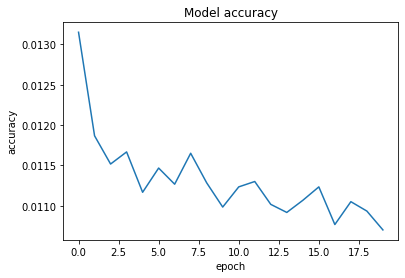

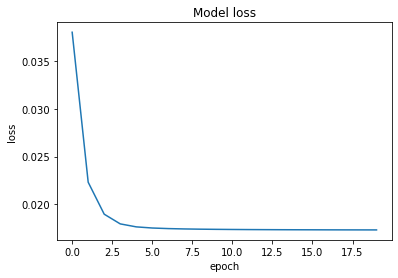

In [11]:
plot_history(history)

In [12]:
codings = encoder.predict(x_test)

In [13]:
codings.shape

(10000, 32)

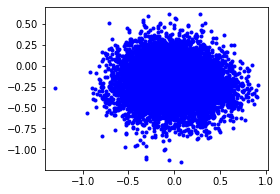

In [9]:
fig = plt.figure(figsize=(4, 3))
plt.plot(codings[:,0], codings[:,1], "b.")
plt.show()